In [1]:
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install scikit-posthocs

In [48]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 


In [3]:
#import event and condition dataframes
ER_df= pd.read_csv(r"C:\Users\Miranda\.ipython\CapstoneCoding\dataframes_csv_format\ER_df.csv")
hospital_df = pd.read_csv(r"C:\Users\Miranda\.ipython\CapstoneCoding\dataframes_csv_format\hospital_df.csv")
outpatient_df = pd.read_csv(r"C:\Users\Miranda\.ipython\CapstoneCoding\dataframes_csv_format\outpatient_df.csv")


In [4]:
#the cleaned dataframes-no duplicates-no NAN--no -15
print(f'ER: {ER_df.shape}')
print(f'Hospital: {hospital_df.shape}')
print(f'Outpatient: {outpatient_df.shape}')

ER: (2500, 5)
Hospital: (1119, 5)
Outpatient: (11422, 5)


In [5]:
#column refresher
ER_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ICD10     2500 non-null   object 
 1   medicaid  2500 non-null   float64
 2   medicare  2500 non-null   float64
 3   private   2500 non-null   float64
 4   month     2500 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 97.8+ KB


Investigate the data statistically

In [6]:
#total for Medicare, Medicaid, Private for each
ER_medicare = ER_df['medicare'].sum()
ER_medicaid = ER_df['medicaid'].sum()
ER_private = ER_df['private'].sum()
ER_total_payments = ER_medicare + ER_medicaid + ER_private
print(f'ER_medicare: ${ER_medicare:,.2f}, ER_medicaid: ${ER_medicaid:,.2f}, ER_private: ${ER_private:,.2f}, ER_total_payments: ${ER_total_payments:,.2f}')

hospital_medicare = hospital_df['medicare'].sum()
hospital_medicaid = hospital_df['medicaid'].sum()
hospital_private = hospital_df['private'].sum()
hospital_total_payments = hospital_medicare + hospital_medicaid + hospital_private
print(f'hospital_medicare: ${hospital_medicare:,.2f}, hospital_medicaid: ${hospital_medicaid:,.2f}, hospital_private: ${hospital_private:,.2f}, hospital_total_payments: ${hospital_total_payments:,.2f}')

outpatient_medicare = outpatient_df['medicare'].sum()
outpatient_medicaid = outpatient_df['medicaid'].sum()
outpatient_private = outpatient_df['private'].sum()
outpatient_total_payments = outpatient_medicare + outpatient_medicaid + outpatient_private
print(f'outpatient_medicare: ${outpatient_medicare:,.2f}, outpatient_medicaid: ${outpatient_medicaid:,.2f}, outpatient_private: ${outpatient_private:,.2f}, outpatient_total_payments: ${outpatient_total_payments:,.2f}')


ER_medicare: $417,915.50, ER_medicaid: $343,706.95, ER_private: $1,442,373.94, ER_total_payments: $2,203,996.39
hospital_medicare: $8,440,351.92, hospital_medicaid: $1,857,870.60, hospital_private: $7,417,386.64, hospital_total_payments: $17,715,609.16
outpatient_medicare: $1,072,116.65, outpatient_medicaid: $597,912.29, outpatient_private: $4,696,794.70, outpatient_total_payments: $6,366,823.64


In [7]:
#the max paid care facility the payer and the value
ER_facility = {'Medicare' : ER_medicare, 'Medicaid' : ER_medicaid, 'Private': ER_private}
ER_top_payer = max(ER_facility, key=ER_facility.get)
print(f'Highest ER Payer: {ER_top_payer}: ${ER_facility[ER_top_payer]:,.2f}')

hospital_facility = {'Medicare':hospital_medicare,'Medicaid':hospital_medicaid,'Private':hospital_private}
hospital_top_payer = max(hospital_facility, key=hospital_facility.get)
print(f'Hospital_total payments: {hospital_top_payer}: ${hospital_facility[hospital_top_payer]:,.2f}')

outpatient_facility = {'Medicare':outpatient_medicare,'Medicaid':outpatient_medicaid, 'Private':outpatient_private}
outpatient_top_payer = max(outpatient_facility, key=outpatient_facility.get)
print(f'Outpatient_total payments: {outpatient_top_payer}: ${outpatient_facility[outpatient_top_payer]:,.2f}')

Highest ER Payer: Private: $1,442,373.94
Hospital_total payments: Medicare: $8,440,351.92
Outpatient_total payments: Private: $4,696,794.70


In [8]:
#total across all payers for the year
medicare_2023 = ER_medicare + hospital_medicare + outpatient_medicare
medicaid_2023 = ER_medicaid + hospital_medicaid + outpatient_medicaid
private_2023 = ER_private + hospital_private + outpatient_private

#total payment of all payers for 2023
total_2023_payments = medicare_2023 + medicaid_2023 + private_2023
print(f'Total 2023 Payments: ${total_2023_payments:,.2f}')

#percentage of payment for 2023
medicare_2023__percentage = medicare_2023/total_2023_payments * 100
medicaid_2023__percentage = medicaid_2023/total_2023_payments * 100
private_2023__percentage = private_2023/total_2023_payments * 100


print(f'Medicare 2023 payments: ${medicare_2023:,.2f}, Medicare percentage: {medicare_2023__percentage:,.2f} %')
print(f'Medicaid 2023 payments: ${medicaid_2023:,.2f}, Medicaid percentage: {medicaid_2023__percentage:,.2f} %')
print(f'Private 2023 payments: ${private_2023:,.2f}, Private percentage: {private_2023__percentage:,.2f} %')

Total 2023 Payments: $26,286,429.19
Medicare 2023 payments: $9,930,384.07, Medicare percentage: 37.78 %
Medicaid 2023 payments: $2,799,489.84, Medicaid percentage: 10.65 %
Private 2023 payments: $13,556,555.28, Private percentage: 51.57 %


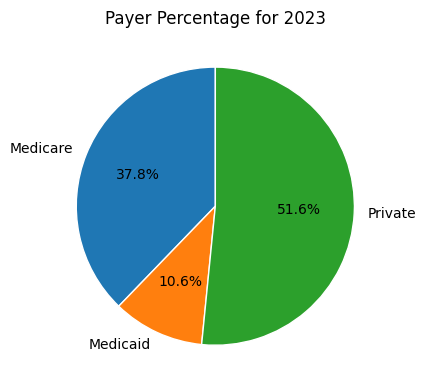

In [9]:
#visual of payers
payers = ['Medicare', 'Medicaid', 'Private']
percentages = [medicare_2023__percentage, medicaid_2023__percentage, private_2023__percentage]
plt.figure(figsize=(6,4))
plt.pie(percentages, labels=payers, autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor': 'white'})
plt.title('Payer Percentage for 2023')
plt.tight_layout()
plt.show()

In [10]:
#ER month with highest payment for all payers
ER_monthly_summary = ER_df.groupby('month')[['medicare', 'medicaid','private']].sum()
ER_monthly_summary['monthly_total'] = ER_monthly_summary.sum(axis=1)

#month with highest payment
ER_highest_month = ER_monthly_summary['monthly_total'].idxmax()
ER_highest_values = ER_monthly_summary.loc[ER_highest_month]

#ER top payer
ER_top_monthly_payer = ER_highest_values[['medicare', 'medicaid', 'private']].idxmax()
print(f'ER Month with Highest Payments: {ER_highest_month}')
print(f'Total: ${ER_highest_values['monthly_total']:,.2f}')
print(f'Top Payer: {ER_top_monthly_payer} ${ER_highest_values[ER_top_monthly_payer]:,.2f}\n')

#Hospital month with highest payment for all payers
hospital_monthly_summary = hospital_df.groupby('month')[['medicare', 'medicaid','private']].sum()
hospital_monthly_summary['monthly_total'] = hospital_monthly_summary.sum(axis=1)

#month with highest payment
hospital_highest_month = hospital_monthly_summary['monthly_total'].idxmax()
hospital_highest_values = hospital_monthly_summary.loc[hospital_highest_month]

#Hospital top payer
hospital_top_monthly_payer =hospital_highest_values[['medicare', 'medicaid', 'private']].idxmax()
print(f'Hospital Month with Highest Payments: {hospital_highest_month}')
print(f'Total: ${hospital_highest_values['monthly_total']:,.2f}')
print(f'Top Payer: {hospital_top_monthly_payer} ${hospital_highest_values[hospital_top_monthly_payer]:,.2f}\n')

#Outpatient month with highest payment for all payers
outpatient_monthly_summary = outpatient_df.groupby('month')[['medicare', 'medicaid','private']].sum()
outpatient_monthly_summary['monthly_total'] = outpatient_monthly_summary.sum(axis=1)

#month with highest payment
outpatient_highest_month = outpatient_monthly_summary['monthly_total'].idxmax()
outpatient_highest_values = outpatient_monthly_summary.loc[outpatient_highest_month]

#Outpatient top payer
outpatient_top_monthly_payer = outpatient_highest_values[['medicare', 'medicaid', 'private']].idxmax()
print(f'Outpatient Month with Highest Payments: {outpatient_highest_month}')
print(f'Total: ${outpatient_highest_values['monthly_total']:,.2f}')
print(f'Top Payer: {outpatient_top_monthly_payer} ${outpatient_highest_values[outpatient_top_monthly_payer]:,.2f}\n')


ER Month with Highest Payments: 2
Total: $308,774.78
Top Payer: private $227,438.42

Hospital Month with Highest Payments: 11
Total: $2,212,753.94
Top Payer: private $1,160,036.17

Outpatient Month with Highest Payments: 5
Total: $689,888.75
Top Payer: private $548,879.62



In [11]:
# create a function for plotting
def plot_labels(data , x_axis=None,y_axis=None, kind='bar', title= '', xlabel='', ylabel='', figsize=(10,6), color=None):
    ax = data.plot(x=x_axis, y=y_axis, kind=kind,figsize=figsize, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()

In [12]:
#total payments for year by care facility----B deliverable
facility_payments = {'Outpatient': outpatient_total_payments, 'Hospital': hospital_total_payments, 'ER':ER_total_payments}
facility_payments_df = pd.DataFrame(list(facility_payments.items()), columns=['Facility', 'Total Payments'])
facility_payments_df.head(3)

,Facility,Total Payments
0,Outpatient,6366823.64
1,Hospital,17715609.16
2,ER,2203996.39


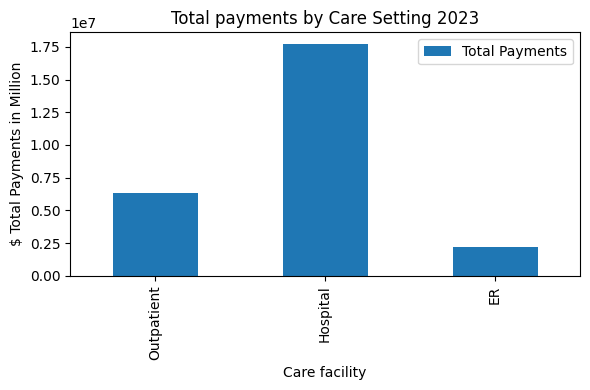

In [13]:
#visual of payments by care setting
plot_labels(data= facility_payments_df, kind='bar', title='Total payments by Care Setting 2023', 
            x_axis='Facility', y_axis='Total Payments',xlabel='Care facility', ylabel='$ Total Payments in Million', figsize=(6,4))

In [14]:
#payments sorted by Insurers
summary = {'Medicare':[ER_medicare,hospital_medicare,outpatient_medicare], 
'Medicaid': [ER_medicaid, hospital_medicaid, outpatient_medicaid],
'Private': [ER_private, hospital_private, outpatient_private]}

summary_df = pd.DataFrame(summary, index=['ER', 'Hospital', 'Outpatient'])

In [15]:
#overview of the datset
summary_df.describe().round(2)

,Medicare,Medicaid,Private
count,3.00,3.00,3.00
mean,3310128.02,933163.28,4518851.76
std,4454929.04,810843.89,2991478.22
min,417915.50,343706.95,1442373.94
25%,745016.08,470809.62,3069584.32
50%,1072116.65,597912.29,4696794.70
75%,4756234.29,1227891.44,6057090.67
max,8440351.92,1857870.60,7417386.64


The mean of all medicare, medicaid and private insurers shows medicaid as the largest, priveate payors and last, least mean payor as medicare.


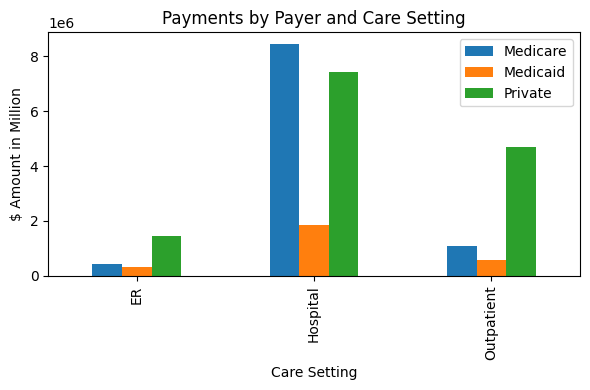

<Figure size 640x480 with 0 Axes>

In [16]:
#visual payments sorted by Insurers
plot_labels(summary_df, kind='bar', title='Payments by Payer and Care Setting', xlabel='Care Setting', ylabel='$ Amount in Million', figsize=(6,4))

plt.xticks
plt.tight_layout()
plt.show()

In [17]:
#---------KPI 2---------------
#combine all datasets to compare
ER_df['facility'] = 'ER'
hospital_df['facility'] = 'hospital'
outpatient_df['facility'] = 'outpatient'

entities_df = pd.concat([ER_df, hospital_df, outpatient_df], ignore_index=True)
payer_cols= ['medicare','medicaid', 'private']

#total payments
entities_df['total'] = entities_df[payer_cols].sum(axis=1)

#Average payment per Visit----------------
avg_payment_per_visit = entities_df.groupby('facility')['total'].mean().reset_index(name='avg_payment_per_visit')
avg_payment_per_visit['avg_payment_per_visit'] = avg_payment_per_visit['avg_payment_per_visit'].round(2)

#average number of visits per month
monthly_visits = entities_df.groupby(['facility', 'month']).size().reset_index(name='num_visits')
avg_visits_per_month = (monthly_visits.groupby('facility')['num_visits'].mean().reset_index(name='avg_visits_per_month'))
avg_visits_per_month['avg_visits_per_month'] = avg_visits_per_month['avg_visits_per_month'].round(0).astype(int)

#average visits per year
total_visits_year = entities_df.groupby('facility').size().reset_index(name='total_visits_year')

#cleaned summary
visit_summary = avg_payment_per_visit.merge(avg_visits_per_month, on='facility').merge(total_visits_year, on='facility').sort_values('facility')

print('Visit Summary for 2023 by Facility')
print(visit_summary.to_string(index=False))



Visit Summary for 2023 by Facility
  facility  avg_payment_per_visit  avg_visits_per_month  total_visits_year
        ER                 881.60                   208               2500
  hospital               15831.64                    93               1119
outpatient                 557.42                   952              11422


In [18]:
entities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15041 entries, 0 to 15040
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ICD10     15041 non-null  object 
 1   medicaid  15041 non-null  float64
 2   medicare  15041 non-null  float64
 3   private   15041 non-null  float64
 4   month     15041 non-null  int64  
 5   facility  15041 non-null  object 
 6   total     15041 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 822.7+ KB


In [19]:
#Top three frequent ICD10 variables
ER_conditions = ER_df['ICD10'].value_counts().head(3)
hospital_conditions = hospital_df['ICD10'].value_counts().head(3)
outpatient_conditions = outpatient_df['ICD10'].value_counts().head(3)


print(f'Top 3 frequent ER_conditions: {ER_conditions}')
print(f'Top 3 frequent hospital_conditions: {hospital_conditions}')
print(f'Top 3 frequent outpatient_conditions: {outpatient_conditions}')


Top 3 frequent ER_conditions: ICD10
I10    93
T14    90
N39    81
Name: count, dtype: int64
Top 3 frequent hospital_conditions: ICD10
Z34    75
Z96    50
J18    45
Name: count, dtype: int64
Top 3 frequent outpatient_conditions: ICD10
C50    677
M25    418
E11    348
Name: count, dtype: int64


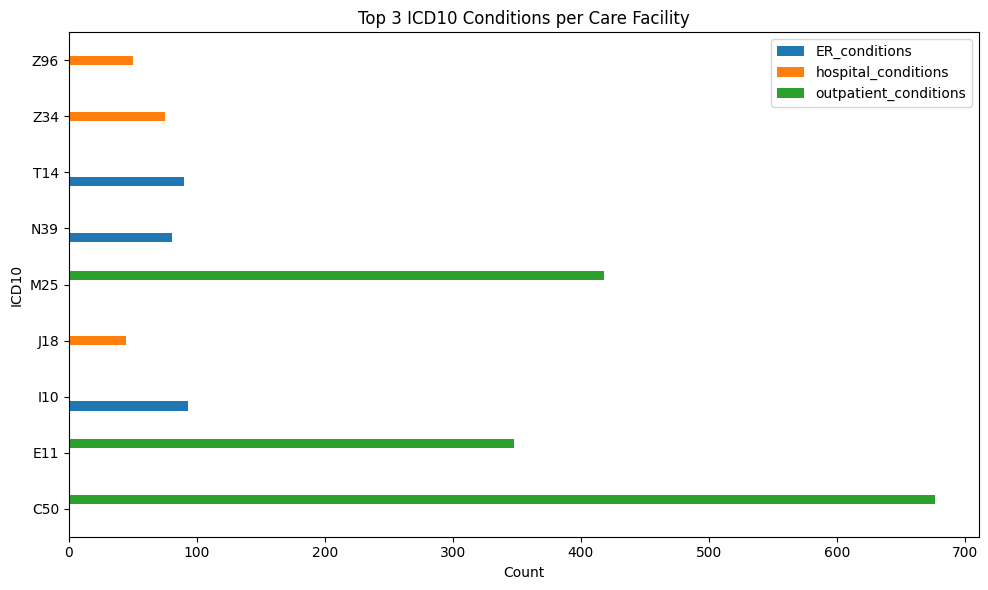

In [20]:
#plot common ICD10 conditions for each care facility
conditions_per_facility = pd.DataFrame({'ER_conditions':ER_df['ICD10'].value_counts().head(3),
                                       'hospital_conditions':hospital_df['ICD10'].value_counts().head(3),
                                       'outpatient_conditions':outpatient_df['ICD10'].value_counts().head(3)})

#use function for conditions_per_facility dataframe
plot_labels(conditions_per_facility, kind='barh', title='Top 3 ICD10 Conditions per Care Facility', xlabel='Count', ylabel='ICD10')


This horizontal bar chart is in line with our top three from each care facility code above.  The codes were crossed referenced with the MEPS ICD10 file:
    - ER care facility number one visit: I10 = ESSENTIAL (PRIMARY) HYPERTENSION                           
    - Hospital care facility number one visit: Z34 = ENCOUNTER FOR SUPERVISION OF NORMAL PREGNANCY              
    - Outpatient care facility number one visit: C50 = MALIGNANT NEOPLASM OF BREAST 
                            

In [21]:
#do any of the care facilities have a certain code that all of them treat and how large is it?

#codes in all facilities
codes = set(ER_df['ICD10'].unique())\
    & set(hospital_df['ICD10'].unique())\
    & set(outpatient_df['ICD10'].unique())
    
print(f'Number of ICD10 variables for all care facilities: {len(codes)}')

#how many ICD10 variables are there in all of the datasets
ER_ICD10 = ER_df['ICD10'].value_counts()
hospital_ICD10 = hospital_df['ICD10'].value_counts()
outpatient_ICD10 = outpatient_df['ICD10'].value_counts()

#combine all counts into one dataframe
common_condition = pd.DataFrame({'ER': ER_ICD10, 'Hospital': hospital_ICD10, 'Outpatient': outpatient_ICD10})

#keep only codes that are in all 3 datasets
common_condition = common_condition.loc[list(codes)]

#sort by volume
common_condition['Total'] = common_condition.sum(axis=1)
common_condition = common_condition.sort_values(by='Total', ascending=False)

print(common_condition.head(3))

Number of ICD10 variables for all care facilities: 147
         ER  Hospital  Outpatient  Total
ICD10                                   
C50     4.0       7.0       677.0  688.0
M25    36.0      29.0       418.0  483.0
E11    36.0      15.0       348.0  399.0


All care facilities altogether have 147 ICD10 variables.  They share C50 as the number one, but just looking at it shows us that the Outpatient facility is consuming the count.  There are two other variables that are not on the top three list shown in the common ICD10 variable.
    - M25: OTHER JOINT DISORDER, NOT ELSEWHERE CLASSIFIED             
    - E11: TYPE 2 DIABETES MELLITUS"                                   

In the analysis we have uncovered hospital visits accounted for the most paid care facility.  Office visits were the highest visits from our datasets in 2023. The condition that accounted to the most visits for the 2023 dataset was outpatient C50, Malignant neoplasm of the breast. The outpatient dataset is so much larger than the other datasets that patterns are obscured. The use of standardized counts will show which ICD10 codes are common in each care setting and not just the highest count. 

In [22]:
#-----------KPI 3 ------------------
#change ICD10 codes to the percentage of visits from each dataset
ER_ICD_percent = ER_ICD10/ER_ICD10.sum()*100
hospital_ICD_percent = hospital_ICD10/hospital_ICD10.sum()*100
outpatient_ICD_percent = outpatient_ICD10/outpatient_ICD10.sum()*100

#combine to dataframe
common_condition_percent = pd.DataFrame({'ER_%': ER_ICD_percent, 'Hospital_%': hospital_ICD_percent,
                                         'Outpatient_%': outpatient_ICD_percent})

#codes in all datasets
common_condition_percent = common_condition_percent.loc[list(codes)]

#create column for average percent to see rank(large #  across all sets), rather than just a large percentage
common_condition_percent['Average_%'] = common_condition_percent.mean(axis=1)

#sort the most common ICD10
common_condition_percent = common_condition_percent.sort_values(by='Average_%', ascending=False)
#format
common_condition_percent = common_condition_percent.round(2)

common_condition_percent.head(15)


,ER_%,Hospital_%,Outpatient_%,Average_%
ICD10,,,,
Z34,1.88,6.70,2.23,3.60
M25,1.44,2.59,3.66,2.56
I10,3.72,2.95,0.94,2.54
Z96,0.28,4.47,2.35,2.36
J18,2.48,4.02,0.27,2.26
C50,0.16,0.63,5.93,2.24
I48,1.72,3.13,1.50,2.11
T14,3.60,1.79,0.95,2.11
E11,1.44,1.34,3.05,1.94


Highest paid ICD10 payment is C50 with $1376.0

Now looking at the percentage instead of count a inflated by outpatient volume Z34, Encounter for supervision of normal pregnancy is the common condition across all three care facilities.

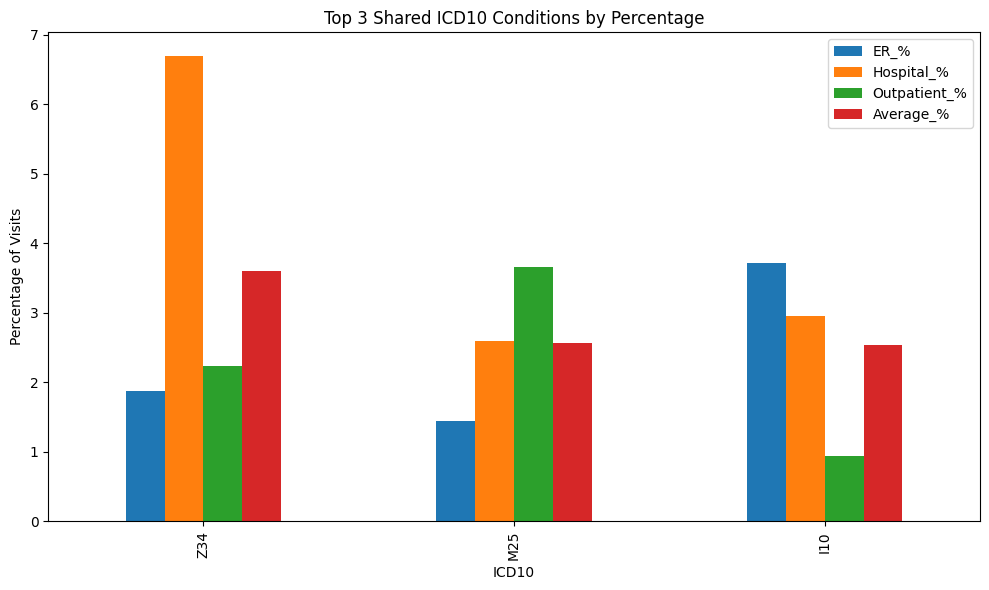

In [23]:
#visual
top3 = common_condition_percent.head(3)

#function for plotting
plot_labels(top3, kind='bar', title='Top 3 Shared ICD10 Conditions by Percentage', xlabel='ICD10',
            ylabel='Percentage of Visits')

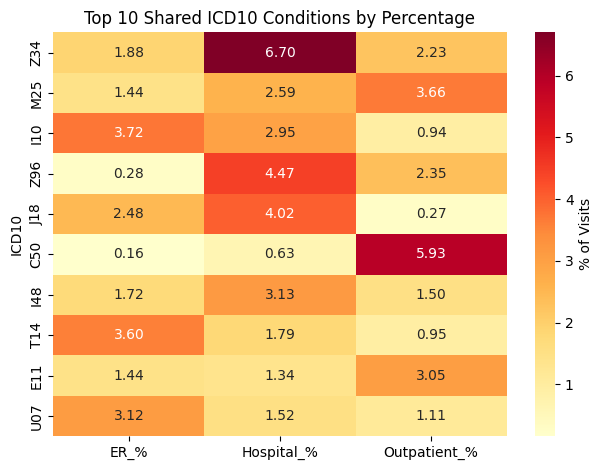

In [24]:
#heatmap for common conditions
#only the top conditions
top_10 = common_condition_percent.head(10).drop(columns='Average_%')

#plot with seaborn
sns.heatmap(top_10, annot=True,fmt='.2f', cmap='YlOrRd', cbar_kws={'label': '% of Visits'})
plt.title('Top 10 Shared ICD10 Conditions by Percentage')
plt.xlabel=('Care Facility')
plt.ylabel=('ICD10')
plt.tight_layout()
plt.show()

The heat chart color and organization brings the ICD10 varaibles into focus more than the top3 barchart above.  The density of color for the top shared ICD10 Z34 for instance has the highest percentage in the Hospital_% column, and still shows the other columns percentage contribution to being the top common ICD10.

KPI#3:
Now the top common ICD10 condition treatment for 2023 from payers is Z34,  Encounter for supervision of normal pregnancy.

October was the largest average payment by insurers per visit: $2380.71

In [25]:
icd10_long = entities_df.melt(id_vars=['facility', 'ICD10'], value_vars=payer_cols, var_name='payer', value_name='payment').groupby(['facility', 'payer', 'ICD10'], as_index=False)['payment'].sum()
#add percentage
icd10_long['payment_pct'] = icd10_long.groupby(['facility', 'payer'])['payment'].transform(lambda x:100 * x/x.sum())

#select the top condition and payer
top_icd10= icd10_long.sort_values(['facility', 'payer', 'payment'], ascending=[True, True, False]).groupby(['facility', 'payer']).head(1).reset_index(drop=True)

#round and print
top_icd10[['payment', 'payment_pct']] = top_icd10[['payment', 'payment_pct']].round(0)
print('Top ICD10 Condition per Payment per Year per Facility and Payer')
for f in top_icd10['facility'].unique():
    print(f)
    display_df = top_icd10[top_icd10['facility']== f][['payer', 'ICD10', 'payment','payment_pct']]
    print(display_df.to_string(index=False))
                                                                          

Top ICD10 Condition per Payment per Year per Facility and Payer
ER
   payer ICD10  payment  payment_pct
medicaid   J45  18249.0          5.0
medicare   I10  19840.0          5.0
 private   I63 112594.0          8.0
hospital
   payer ICD10  payment  payment_pct
medicaid   Z34 203073.0         11.0
medicare   M53 695747.0          8.0
 private   Z34 796696.0         11.0
outpatient
   payer ICD10  payment  payment_pct
medicaid   K50  47159.0          8.0
medicare   C50  75388.0          7.0
 private   C50 517124.0         11.0


In [26]:
#month with highest payment and ICD condition treated
#top ICD10 per month by payment
top_ICD10_month = entities_df.groupby(['facility', 'month', 'ICD10'])[payer_cols].sum().reset_index()
#melt to create payer column
top_ICD10_month = top_ICD10_month.melt(id_vars=['facility', 'month', 'ICD10'], var_name='payer', value_name='payment')

#for each facility, payer, month and top ICD
top_ICD10_monthly = top_ICD10_month.sort_values(['facility', 'payer', 'month', 'payment'],
                    ascending=[True, True, True, False]).groupby(['facility', 'payer', 'month']).head(1).reset_index(drop=True)

#round payment
top_ICD10_monthly['payment'] = top_ICD10_monthly['payment'].round(0)


#month with highest ICD10 payment and facility
top_payment_month = top_ICD10_monthly.sort_values(['facility', 'payer', 'payment'],ascending=[True, True, False]).groupby(['facility', 'payer']).head(1).reset_index(drop=True)

print('Top ICD-10 Condition with the Highest Payment Month per Facility and Payer')
for facility in top_payment_month['facility'].unique():
    print(facility)
    display_df = top_payment_month[top_payment_month['facility'] == facility][['payer', 'ICD10', 'month', 'payment']]
    print(display_df.to_string(index=False))


Top ICD-10 Condition with the Highest Payment Month per Facility and Payer
ER
   payer ICD10  month  payment
medicaid   I10      6   5222.0
medicare   I10      6   6480.0
 private   I63      2 112428.0
hospital
   payer ICD10  month  payment
medicaid   J45     10  85184.0
medicare   M53     11 269294.0
 private   M25     11 275707.0
outpatient
   payer ICD10  month  payment
medicaid   N83      2  14848.0
medicare   M25      2  15410.0
 private   I48      5 108127.0


In [27]:
#locate the highest payment of any ICD10 from payers and facility
highest_ICD10_payment = top_ICD10_monthly.loc[top_ICD10_monthly['payment'].idxmax()]

print('Highest Payment Received for any Month, Payer, or Facility')
print(f'Facility: {highest_ICD10_payment['facility']}')
print(f'Payer: {highest_ICD10_payment['payer']}')
print(f'ICD-10: {highest_ICD10_payment['ICD10']}')
print(f'Month: {highest_ICD10_payment['month']}')
print(f'Payment: ${highest_ICD10_payment['payment']:,.0f}')

Highest Payment Received for any Month, Payer, or Facility
Facility: hospital
Payer: private
ICD-10: M25
Month: 11
Payment: $275,707


In [ ]:
#----------------------KPI 5----------------------
#Payment growth or decline through 2023
#sum monthly totals
monthly_totals = entities_df.groupby(['facility', 'month'])[payer_cols].sum().reset_index().sort_values(['facility', 'month'])

#month to month percentage changes
for payer in payer_cols:
    monthly_totals[f'{payer}_pct_change'] = (monthly_totals.groupby('facility')[payer].pct_change() * 100).round(2)
    
#growth from January through December 2023
trend_summary = monthly_totals.groupby('facility')[[f'{p}_pct_change' for p in payer_cols]].mean().reset_index().rename(columns= {'medicare_pct_change': 'medicare_avg_monthly_change_%',
                                                                                                                                  'medicaid_pct_change': 'medicaid_avg_monthly_change_%',
                                                                                                                                  'private_pct_change': 'private_avg_monthly_change_%'})
print('Average Monthly Payment Changes Through 2023')
print(trend_summary.to_string(index=False))

Average Monthly Payment Changes Trhough 2023
  facility  medicare_avg_monthly_change_%  medicaid_avg_monthly_change_%  private_avg_monthly_change_%
        ER                       0.523636                       3.391818                      0.118182
  hospital                       9.652727                      14.990909                     16.998182
outpatient                       0.765455                       7.991818                      6.262727


facility  month         ER    hospital  outpatient
0             1  243173.80  1237866.23   514823.10
1             2  308774.78  1367478.06   593388.10
2             3  270490.15  1282783.36   504437.82
3             4  218283.58  1311471.68   420740.16
4             5  168045.61  1957419.00   689888.75
5             6  131925.08  1068996.57   488684.81
6             7  126261.30  1520780.36   492664.86
7             8  140092.44  1498180.33   570449.49
8             9  134579.42  1175802.74   384780.56
9            10  129411.13  1329454.72   624586.86
10           11  173370.96  2212753.94   601667.94
11           12  159588.14  1752622.17   480711.19


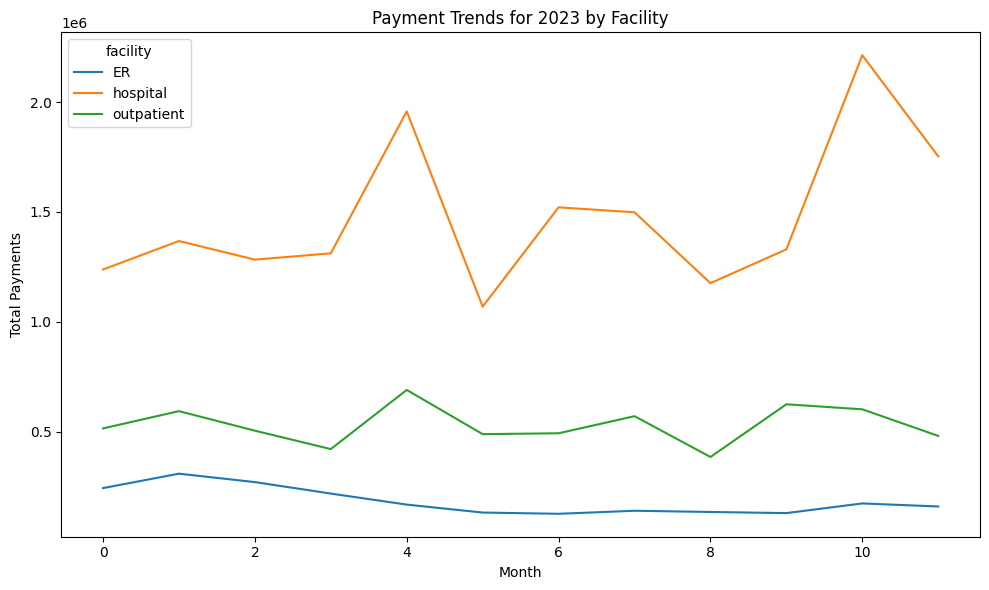

<Figure size 640x480 with 0 Axes>

In [29]:
#visual of percent changes by facility
#add total payment column
monthly_totals['total'] = monthly_totals[payer_cols].sum(axis=1)

#pivot table for multiple lines
pivot_df = monthly_totals.pivot(index='month', columns='facility', values='total').fillna(0).reset_index()
print(pivot_df)


plot_labels(data = pivot_df, x_axis=None,y_axis=pivot_df.columns[1:], kind='line', title= f'Payment Trends for 2023 by Facility', xlabel='Month', ylabel='Total Payments', figsize=(10,6), color=None)
plt.tight_layout()

In [30]:
#prepare dataset for variance analysis(categorical)
top_ICD10_month.info()

top_ICD10_month['facility'] = top_ICD10_month['facility'].astype('category')
top_ICD10_month['payer'] = top_ICD10_month['payer'].astype('category')
top_ICD10_month['payment'] = top_ICD10_month['payment'].astype('float')
top_ICD10_month['month'] = top_ICD10_month['month'].astype('category')
top_ICD10_month['ICD10'] = top_ICD10_month['ICD10'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   facility  11331 non-null  object 
 1   month     11331 non-null  int64  
 2   ICD10     11331 non-null  object 
 3   payer     11331 non-null  object 
 4   payment   11331 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 442.7+ KB


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#anova 3-way regression test
#test mean differences(log) due to very different dollar amounts per facility

top_ICD10_month['payment_log'] = np.log1p(top_ICD10_month['payment'])
#To determine whether there is a statistically significant difference in the mean total payments between insurance payors (Medicare, Medicaid, Private Insurance)
#random sample of 40
model= ols('payment_log ~ C(payer) * C(facility)', data=top_ICD10_month).fit()
anova_table = sm.stats.anova_lm(model, type = 3)
#round the output
anova_round_results = anova_table.round(5)
anova_round_results
#anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(payer),2.0,9471.85066,4735.92533,431.08191,0.0
C(facility),2.0,2260.77805,1130.38902,102.89230,0.0
C(payer):C(facility),4.0,2662.99030,665.74757,60.59887,0.0
Residual,11322.0,124385.05404,10.98614,NaN,NaN


C(payer) p < .05 the payers have significantly different payments
C(facility) p < .05 facilities significantly differ
C(payer): C(facility) p < .05 payer and facility interact, payer differs by facility

Text(0.5, 1.0, 'Interaction for Payer and Facility on Mean Payment')

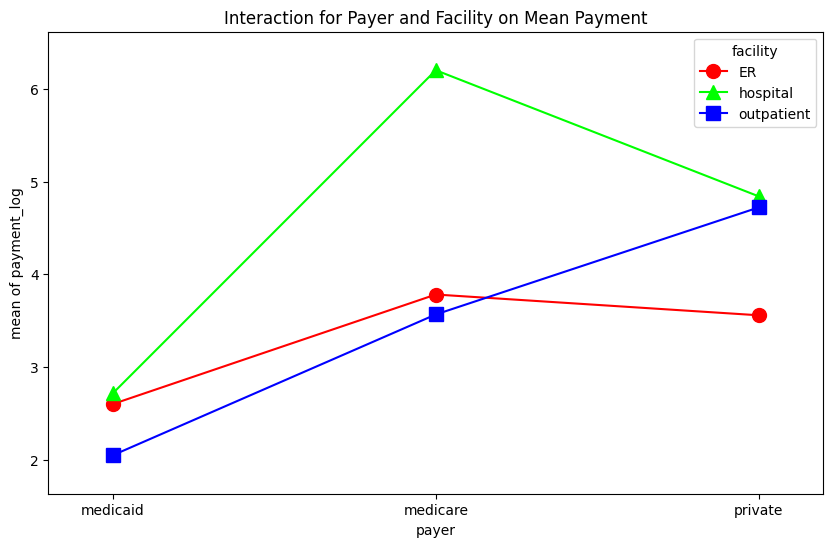

In [32]:
#change types for plotting
top_ICD10_month['facility'] = top_ICD10_month['facility'].astype(str)
top_ICD10_month['payer'] = top_ICD10_month['payer'].astype(str)

#result interpretation
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(10,6))
fig =  interaction_plot(x=top_ICD10_month['payer'], trace=top_ICD10_month['facility'], response=top_ICD10_month['payment_log'],
                        markers=['o', '^','s'], ms=10, ax=ax)
plt.title('Interaction for Payer and Facility on Mean Payment')


In [39]:
#ad_hoc to find what groups are different since p<.05
posthoc_tukey_payer = sp.posthoc_tukey(top_ICD10_month, val_col='payment_log', group_col='payer').round(4) 
posthoc_tukey_facility = sp.posthoc_tukey(top_ICD10_month, val_col= 'payment_log', group_col='facility').round(4) 

#round
posthoc_tukey_payer.round({'sum_sq': 2, 'F':2, 'PR(>F)':7})
posthoc_tukey_facility.round({'sum_sq': 2, 'F':2, 'PR(>F)':7})

print(f' Payer {posthoc_tukey_payer}')
print(f'Facility {posthoc_tukey_facility}')


 Payer           medicare  medicaid  private
medicare       1.0       0.0      0.0
medicaid       0.0       1.0      0.0
private        0.0       0.0      1.0
Facility                 ER  hospital  outpatient
ER          1.0000       0.0      0.1848
hospital    0.0000       1.0      0.0000
outpatient  0.1848       0.0      1.0000


In [34]:
#linear regression model

#changed columns back to type
top_ICD10_month['facility'] = top_ICD10_month['facility'].astype('category')
top_ICD10_month['payer'] = top_ICD10_month['payer'].astype('category')
top_ICD10_month['month'] = top_ICD10_month['month'].astype('category')
top_ICD10_month['ICD10'] = top_ICD10_month['ICD10'].astype('category')
#normalized dataset for model
top_ICD10_month['payment_normalized'] = top_ICD10_month.groupby('facility')['payment'].transform(lambda x: (x - x.mean())/ x.std())
top_ICD10_month['payment_normalized'] = top_ICD10_month['payment_normalized'].astype('float')

#create dummy variables for facility and payer categoric coli=umns
X = pd.get_dummies(top_ICD10_month[['facility', 'payer', 'ICD10', 'month']], drop_first=True)
y = np.log1p(top_ICD10_month['payment_normalized'])

#split into training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit, create and train the data
model = LinearRegression()
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#conclusions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Intercept: {model.intercept_:.3f}')
print(f'Mean Squared Error: {mse:,.3f}')
print(f'R=squared: {r2:.3f}')

Intercept: -0.224
Mean Squared Error: 0.125
R=squared: 0.112


C:\Users\Miranda\AppData\Local\Temp\ipykernel_49144\187045027.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_ICD10_month['payment_normalized'] = top_ICD10_month.groupby('facility')['payment'].transform(lambda x: (x - x.mean())/ x.std())


<function matplotlib.pyplot.show(close=None, block=None)>

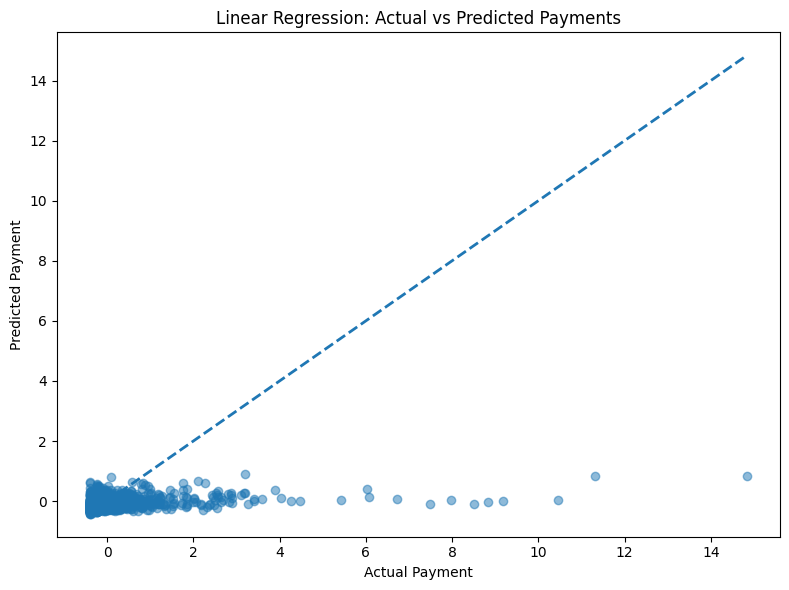

In [35]:
#scatter plot for linear regression
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(np.expm1(y_test), np.expm1(y_pred), alpha=0.5)
ax.plot([0, np.expm1(y_test).max()], [0, np.expm1(y_test).max()],
         lw=2, linestyle='--', label='Perfect Fit')

#parameters of regression line
ax.set_title('Linear Regression: Actual vs Predicted Payments')
ax.set_xlabel('Actual Payment')
ax.set_ylabel('Predicted Payment')
ax.legend
plt.tight_layout()
plt.show

In [ ]:
#not a great line, low R^2 number, changing to random forest

#balance facility and payer
top_ICD10_month['payment_model'] = top_ICD10_month.groupby(['facility', 'payer'])['payment'].transform(lambda x: (x - x.mean())/ x.std())

#clean outliers beacuse the prediction is not good with higher numbers
q99 = top_ICD10_month['payment'].quantile(0.99)
top_ICD10_month = top_ICD10_month[top_ICD10_month['payment'] <= q99]


C:\Users\Miranda\AppData\Local\Temp\ipykernel_49144\3556968973.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_ICD10_month['payment_model'] = top_ICD10_month.groupby(['facility', 'payer'])['payment'].transform(lambda x: (x - x.mean())/ x.std())


In [50]:
#Random forest model changed to GradientBoost model
X = pd.get_dummies(top_ICD10_month[['facility', 'payer', 'ICD10', 'month']], drop_first=True)
y = np.log1p(top_ICD10_month['payment_model'])


#split into training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random forest model
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)

#fit model
gb.fit(X_train, y_train)

#predict the model
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

#conclusions
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'Mean Squared Error: {mse:,.2f}')
print(f'R=squared: {r2:.3f}')

Mean Squared Error: 0.39
R=squared: 0.549


The variance in payment is about 19% according to the R^2 variable.

TypeError: 'str' object is not callable

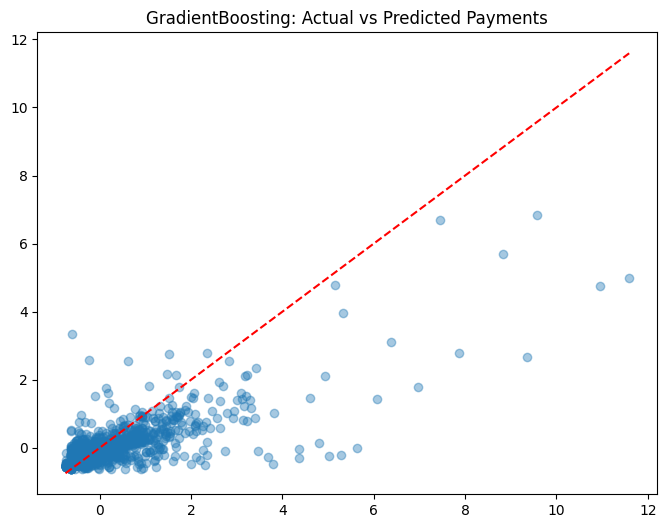

In [53]:
#Visual for gradient boosting model
plt.figure(figsize=(8,6))
plt.scatter(y_true, y_pred, alpha=0.4)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

#parameters of regression line
plt.title('GradientBoosting: Actual vs Predicted Payments')
plt.xlabel("Actual Payment")
plt.ylabel('Predicted Payment')

plt.tight_layout()
plt.show

In [44]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head()

facility_outpatient    0.053005
month_2                0.051630
month_11               0.049188
month_5                0.047290
month_3                0.041536
dtype: float64